In [1]:
import brainio
from brainio.assemblies import walk_coords

raw_assembly = brainio.get_assembly('dicarlo.pico.domain_transfer')
# adjust to new format
raw_assembly['image_label'] = raw_assembly['object_label']
raw_assembly['time_bin_start_ms'] = raw_assembly['time_bin_start']
raw_assembly['time_bin_stop_ms'] = raw_assembly['time_bin_stop']
raw_assembly = raw_assembly[{'time_bin': [start == 70 and stop == 170 for start, stop in zip(
    raw_assembly['time_bin_start_ms'].values, raw_assembly['time_bin_stop_ms'].values)]}]
raw_assembly = type(raw_assembly)(raw_assembly.values, coords={
    coord: (dims, values) for coord, dims, values in walk_coords(raw_assembly)},
                                  dims=raw_assembly.dims)  # reindex

print(raw_assembly)

Loading catalog from entrypoints
Loading lookup from /braintree/home/msch/miniconda3/envs/pipeline_analysis/lib/python3.11/site-packages/brainio_dicarlo/lookup.csv
<xarray.NeuronRecordingAssembly (presentation: 109830, neuroid: 75, time_bin: 1)>
array([[[ 3.11085317],
        [ 2.97858712],
        [ 3.67121519],
        ...,
        [ 1.64194725],
        [ 2.74418549],
        [ 3.23748892]],

       [[-0.4719021 ],
        [-0.18498009],
        [-0.65253468],
        ...,
        [-0.59625857],
        [ 1.49173206],
        [-0.1368709 ]],

       [[-0.33629987],
        [-0.31316474],
        [ 0.16039052],
        ...,
...
        ...,
        [-0.03192845],
        [ 1.25786948],
        [ 1.5330976 ]],

       [[        nan],
        [        nan],
        [        nan],
        ...,
        [        nan],
        [        nan],
        [        nan]],

       [[        nan],
        [        nan],
        [        nan],
        ...,
        [        nan],
        [        nan

In [2]:
from pipeline_analysis import print_assembly_info

print_assembly_info(raw_assembly)

unique images: 3138
repetitions: (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34]), array([3138, 3138, 3138, 3138, 3138, 3138, 3138, 3138, 3138, 3138, 3138,
       3138, 3138, 3138, 3138, 3138, 3138, 3138, 3138, 3138, 3138, 3138,
       3138, 3138, 3138, 3138, 3138, 3138, 3138, 3138, 3138, 3138, 3138,
       3138, 3138]))

unique neuroid_ids: 75
animals: ['Pico']
regions: ['IT']
subregions: ['aIT', 'pIT']

time bins: [(70, 170)]


## filter neuroids

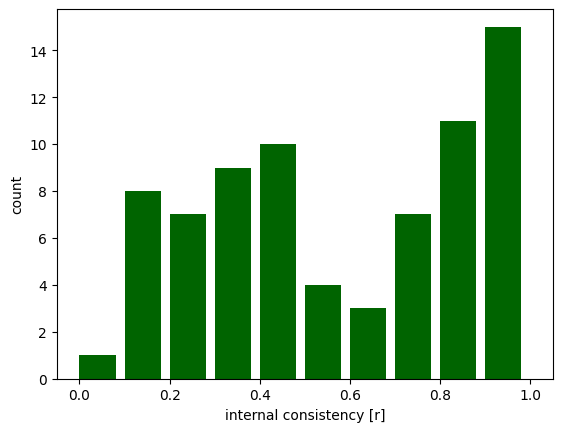

In [3]:
from pipeline_analysis.internal_consistency import plot_consistencies

plot_consistencies(raw_assembly)

plot cumulative

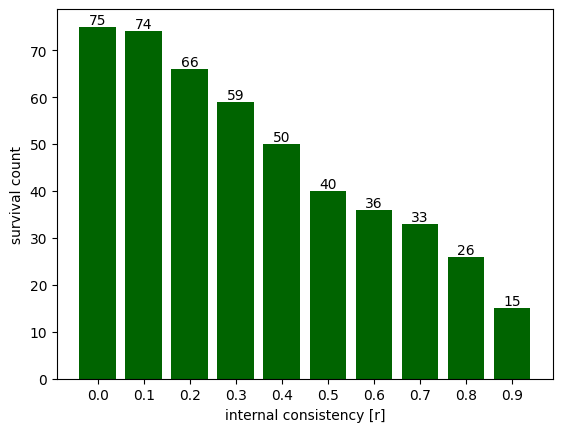

In [4]:
from pipeline_analysis.internal_consistency import plot_consistencies_survival_count

plot_consistencies_survival_count(raw_assembly)

In [5]:
from pipeline_analysis.internal_consistency import filter_assembly

filtered_assembly = filter_assembly(raw_assembly, consistency_threshold=0.7)
print(f"{len(filtered_assembly['neuroid'])} good neuroids > 0.7: {filtered_assembly['neuroid_id'].values}")

33 good neuroids > 0.7: ['A-023' 'B-016' 'B-017' 'B-019' 'B-020' 'B-021' 'B-022' 'B-023' 'C-000'
 'C-014' 'C-017' 'C-018' 'C-019' 'C-024' 'C-028' 'C-029' 'C-030' 'C-031'
 'D-001' 'D-003' 'D-004' 'D-005' 'D-006' 'D-007' 'D-008' 'D-009' 'D-010'
 'D-030' 'D-031' 'E-007' 'E-008' 'E-009' 'F-008']


plot consistencies over time

no analysis over time since we're only using the 70-170 ms time bin

## average out repetitions and time

In [6]:
from pipeline_analysis import average_time_and_repetitions

assembly = average_time_and_repetitions(filtered_assembly)
print(assembly)

<xarray.NeuronRecordingAssembly (presentation: 3138, neuroid: 33)>
array([[ 0.98062103, -0.8027551 , -0.41682308, ..., -0.30285499,
        -0.25109641, -0.32264192],
       [ 0.69236202, -0.87776009, -0.1682241 , ..., -0.51101553,
        -0.53531606, -0.34664032],
       [ 1.44847495, -0.42870906, -0.13490219, ...,  0.08136796,
        -0.04598032, -0.18723625],
       ...,
       [-0.45993761,  0.17311674, -0.66629744, ..., -0.24061019,
         0.07621964, -0.18184742],
       [-0.66801885,  1.17567136,  1.25000523, ...,  0.20902031,
         0.42966308,  0.47077823],
       [ 0.09085072,  0.59354134,  0.55479724, ...,  0.09857799,
         0.16415084,  0.26500628]])
Coordinates:
  * neuroid                        (neuroid) MultiIndex
  - col                            (neuroid) int64 2 3 2 2 2 2 2 ... 8 8 8 8 8 9
  - row                            (neuroid) int64 9 3 3 4 5 6 7 ... 9 8 3 1 2 1
  - bank                           (neuroid) object 'A' 'B' 'B' ... 'E' 'E' 'F'
  - elec 

## Readout capability

num sites: 100%|██████████| 5/5 [00:21<00:00,  4.28s/it]


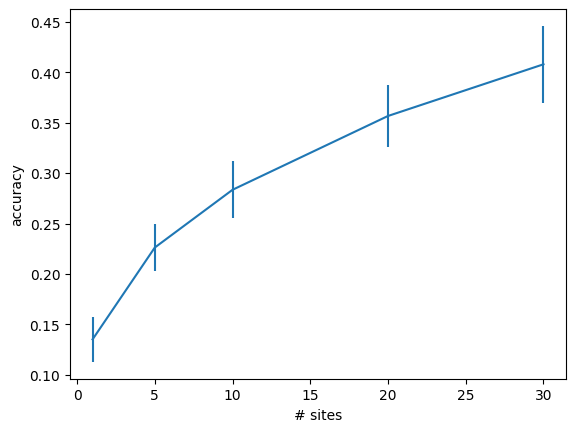

In [7]:
from pipeline_analysis.readout_performance import plot_sites_vs_accuracy

plot_sites_vs_accuracy(assembly, sites=(1, 5, 10, 20, 30))